In [1]:
import os

In [2]:
%pwd

'e:\\Data Science\\LoanApprovalAppWith-Mlflow\\Loan-APP\\research'

In [3]:
os.chdir("../")

In [4]:
%pwd

'e:\\Data Science\\LoanApprovalAppWith-Mlflow\\Loan-APP'

In [5]:
import pandas as pd

In [6]:
df = pd.read_csv("artifacts/data_ingestion/loan_approval_data.csv")
df.head()

,loan_id,gender,married,dependents,education,self_employed,applicantincome,coapplicantincome,loanamount,loan_amount_term,credit_history,property_area,loan_status
0,lp001002,male,no,0.0,graduate,no,5849,0.0,NaN,360.0,1.0,urban,y
1,lp001003,male,yes,1.0,graduate,no,4583,1508.0,128.0,360.0,1.0,rural,n
2,lp001005,male,yes,0.0,graduate,yes,3000,0.0,66.0,360.0,1.0,urban,y
3,lp001006,male,yes,0.0,not graduate,no,2583,2358.0,120.0,360.0,1.0,urban,y
4,lp001008,male,no,0.0,graduate,no,6000,0.0,141.0,360.0,1.0,urban,y


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   loan_id            614 non-null    object 
 1   gender             601 non-null    object 
 2   married            611 non-null    object 
 3   dependents         599 non-null    float64
 4   education          614 non-null    object 
 5   self_employed      582 non-null    object 
 6   applicantincome    614 non-null    int64  
 7   coapplicantincome  614 non-null    float64
 8   loanamount         592 non-null    float64
 9   loan_amount_term   600 non-null    float64
 10  credit_history     564 non-null    float64
 11  property_area      614 non-null    object 
 12  loan_status        614 non-null    object 
dtypes: float64(5), int64(1), object(7)
memory usage: 62.5+ KB


In [8]:
df.isnull().sum()

loan_id               0
gender               13
married               3
dependents           15
education             0
self_employed        32
applicantincome       0
coapplicantincome     0
loanamount           22
loan_amount_term     14
credit_history       50
property_area         0
loan_status           0
dtype: int64

In [9]:
df.drop('loan_id', axis =1 , inplace = True)

In [10]:
print("Percentage of missing values:")
df.isnull().sum()/ len(df) *100

Percentage of missing values:


gender               2.117264
married              0.488599
dependents           2.442997
education            0.000000
self_employed        5.211726
applicantincome      0.000000
coapplicantincome    0.000000
loanamount           3.583062
loan_amount_term     2.280130
credit_history       8.143322
property_area        0.000000
loan_status          0.000000
dtype: float64

In [11]:
nan_cat_feature = ['gender', 'married', 'self_employed', 'credit_history']
for col in nan_cat_feature:
    df.fillna({col: df[col].mode()[0]}, inplace = True)

In [12]:
nan_cont_feature = ['dependents', 'loanamount', 'loan_amount_term']
for col in nan_cont_feature:
    df.fillna({col: df[col].median()}, inplace = True)

In [13]:
df.isnull().sum()

gender               0
married              0
dependents           0
education            0
self_employed        0
applicantincome      0
coapplicantincome    0
loanamount           0
loan_amount_term     0
credit_history       0
property_area        0
loan_status          0
dtype: int64

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

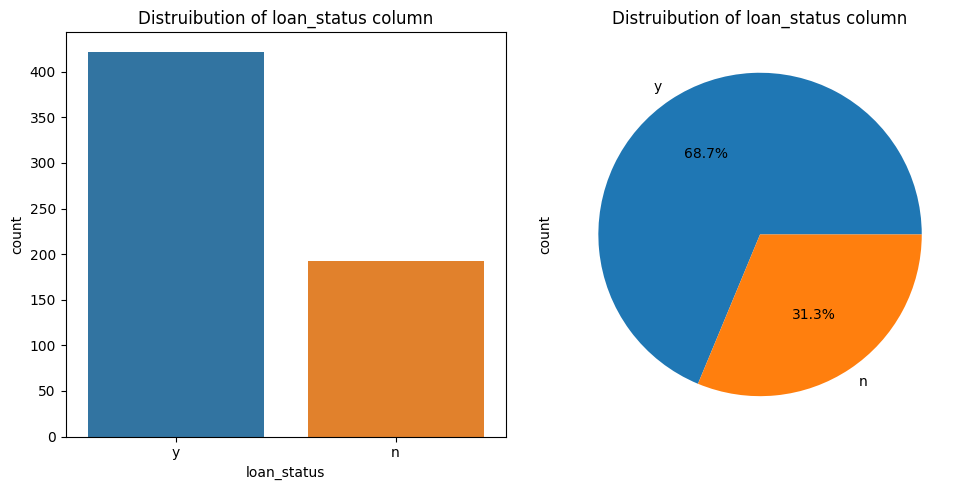

In [15]:
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.title('Distruibution of loan_status column')
sns.countplot(data = df, x = 'loan_status', hue = 'loan_status')

plt.subplot(1, 2, 2)
plt.title('Distruibution of loan_status column')
df['loan_status'].value_counts().plot(kind ='pie', autopct = '%1.1f%%')

plt.tight_layout()
plt.show()

### Encode the categorical data

In [16]:
df_obj = df.select_dtypes('O')

In [17]:
for col in df_obj:
    print(df[col].value_counts(), '\n')

gender
male      502
female    112
Name: count, dtype: int64 

married
yes    401
no     213
Name: count, dtype: int64 

education
graduate        480
not graduate    134
Name: count, dtype: int64 

self_employed
no     532
yes     82
Name: count, dtype: int64 

property_area
semiurban    233
urban        202
rural        179
Name: count, dtype: int64 

loan_status
y    422
n    192
Name: count, dtype: int64 



In [18]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, BaggingClassifier, GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix

import pickle

In [19]:
lbl_ecoder = LabelEncoder()
for col in df_obj:
    df[col] = lbl_ecoder.fit_transform(df[col]) 

df.head()

,gender,married,dependents,education,self_employed,applicantincome,coapplicantincome,loanamount,loan_amount_term,credit_history,property_area,loan_status
0,1,0,0.0,0,0,5849,0.0,128.0,360.0,1.0,2,1
1,1,1,1.0,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,1,1,0.0,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,1,1,0.0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,1,0,0.0,0,0,6000,0.0,141.0,360.0,1.0,2,1


In [20]:
for col in df_obj:
    print(df[col].value_counts(), '\n')

gender
1    502
0    112
Name: count, dtype: int64 

married
1    401
0    213
Name: count, dtype: int64 

education
0    480
1    134
Name: count, dtype: int64 

self_employed
0    532
1     82
Name: count, dtype: int64 

property_area
1    233
2    202
0    179
Name: count, dtype: int64 

loan_status
1    422
0    192
Name: count, dtype: int64 



In [21]:
df.to_csv("artifacts/data_ingestion/data.csv", index=False)

In [22]:
df.head()

,gender,married,dependents,education,self_employed,applicantincome,coapplicantincome,loanamount,loan_amount_term,credit_history,property_area,loan_status
0,1,0,0.0,0,0,5849,0.0,128.0,360.0,1.0,2,1
1,1,1,1.0,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,1,1,0.0,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,1,1,0.0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,1,0,0.0,0,0,6000,0.0,141.0,360.0,1.0,2,1


In [23]:
from dataclasses import dataclass
from pathlib import Path

@dataclass(frozen= True)
class DataValidationConfig:
    root_dir: Path
    STATUS_FILE: str
    unzip_data_dir: Path
    all_schema: dict

In [24]:
from Loan_APP.constants import *
from Loan_APP.utils.common import read_yaml, create_directories

In [25]:
class ConfigurationManager:
    def __init__(
        self,
        config_filepath = CONFIG_FILE_PATH,
        params_filepath = PARAMS_FILE_PATH,
        schema_filepath = SCHEMA_FILE_PATH):
        
        self.config = read_yaml(config_filepath)
        self.params = read_yaml(params_filepath)
        self.schema = read_yaml(schema_filepath)
        
        create_directories([self.config.artifacts_root])
        
    def get_data_validation_config(self) -> DataValidationConfig:
        config = self.config.data_validation
        schema = self.schema.COLUMNS
        
        create_directories([config.root_dir])
        
        data_validation_config = DataValidationConfig(
            root_dir=config.root_dir,
            STATUS_FILE=config.STATUS_FILE,
            unzip_data_dir=config.unzip_data_dir,
            all_schema= schema
        )
        
        return data_validation_config

In [26]:
import os
from Loan_APP import logger

In [29]:
class DataValidation:
    def __init__(self, config: DataValidationConfig):
        self.config = config
        
    def validate_all_columns(self)-> bool:
        try:
            validation_status = None
            
            data = pd.read_csv(self.config.unzip_data_dir)
            all_cols = list(data.columns)
            
            all_schema = self.config.all_schema.keys()
            
            # print(self.config.unzip_data_dir)
            # print(all_cols)
            # print(all_schema)
            
            for col in all_cols:
                if col not in all_schema:
                    # print(col, "False")
                    validation_status = False
                    with open(self.config.STATUS_FILE, 'w') as f:
                        f.write(f"validation status: {validation_status}")
                        break
                else:
                    # print(col, "True")
                    validation_status = True
                    with open(self.config.STATUS_FILE, 'w') as f:
                        f.write(f"validation status: {validation_status}")
            # print(validation_status)
            return validation_status
        except Exception as e:
            raise e

In [30]:
try:
    config = ConfigurationManager()
    data_validation_config = config.get_data_validation_config()
    data_validation = DataValidation(config=data_validation_config)
    data_validation.validate_all_columns()
except Exception as e:
    raise e

[2025-03-06 12:42:46,815: INFO: common: yaml file: config\config.yaml is loaded successfully!]
[2025-03-06 12:42:46,820: INFO: common: yaml file: params.yaml is loaded successfully!]
[2025-03-06 12:42:46,826: INFO: common: yaml file: schema.yaml is loaded successfully!]
[2025-03-06 12:42:46,829: INFO: common: created directory at: artifacts]
[2025-03-06 12:42:46,833: INFO: common: created directory at: artifacts/data_validation]
